In [21]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Supermarket, Postoffice, Doctor

In [22]:
supermarket = pd.read_csv('../Results/SuperMarket_Rating.csv')
del supermarket['Unnamed: 0']
supermarket.replace('NAN', value=0, inplace=True)
supermarket = supermarket.rename(columns={'supermarket Total Count':'Total Count', 'Facility supermarket':'SuperMarket Facility'})
supermarket['Rating']=supermarket['Rating'].astype(float)
supermarket['Total Count']=supermarket['Total Count'].astype(int)
supermarket.head()

,City Name,SuperMarket Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Fresh World Herndon,38.96,-77.42,4.2,Center for Innovation Technology,4
1,Northern Virginia Area,Harris Teeter,38.96,-77.42,4.4,Center for Innovation Technology,4
2,Northern Virginia Area,Shoppers,38.96,-77.42,3.6,Center for Innovation Technology,4
3,Northern Virginia Area,Asian Halal Meat,38.96,-77.42,4.0,Center for Innovation Technology,4
4,Northern Virginia Area,ALDI,38.84,-77.05,4.5,Crystal City and Potomac Yard,6


In [23]:
new_supermarket = supermarket.groupby(['City Name', 'Site Name'])
supermarket_count_df = pd.DataFrame(new_supermarket['Site Name'].value_counts())
supermarket_count_df = supermarket_count_df.rename(columns={'Site Name': 'Total Count'})
supermarket_count_df = supermarket_count_df.reset_index(level=1)
supermarket_count_df = supermarket_count_df.reset_index(level=0)
supermarket_count_df = supermarket_count_df.reset_index(drop=True)
supermarket_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,3
1,Atlanta,Former GM plant,4
2,Atlanta,Midtown,2
3,Atlanta,The High Street Site,5
4,Austin,American-Statesman,3


In [24]:
supermarket_count_final = supermarket_count_df.groupby(['City Name'])
supermarket_count_final_df = pd.DataFrame(supermarket_count_final['Total Count'].sum())
supermarket_count_final_df = supermarket_count_final_df.sort_values(['Total Count'])[::-1]
supermarket_count_final_df = supermarket_count_final_df.reset_index()
supermarket_count_final_df['Type']='Supermarket'
supermarket_count_final_df

,City Name,Total Count,Type
0,New York,46,Supermarket
1,Chicago,44,Supermarket
2,Washington DC,24,Supermarket
3,Boston,22,Supermarket
4,Atlanta,14,Supermarket
5,Austin,12,Supermarket
6,Northern Virginia Area,10,Supermarket
7,Los Angeles,10,Supermarket
8,Raleigh,6,Supermarket


In [25]:
postoff = pd.read_csv('../Results/PostOffice_Rating.csv')
del postoff['Unnamed: 0']
postoff.replace('NAN', value=0, inplace=True)
postoff = postoff.rename(columns={'postoffice Total Count':'Total Count', 'Facility postoffice':'Post Office Facility'})
postoff['Rating']=postoff['Rating'].astype(float)
postoff['Total Count']=postoff['Total Count'].astype(int)
postoff.head()

,City Name,Post Office Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,United States Postal Service,38.96,-77.42,1.4,Center for Innovation Technology,1
1,Northern Virginia Area,United States Postal Service,38.84,-77.05,2.3,Crystal City and Potomac Yard,4
2,Northern Virginia Area,US Post Office,38.84,-77.05,3.0,Crystal City and Potomac Yard,4
3,Northern Virginia Area,United States Postal Service,38.84,-77.05,2.9,Crystal City and Potomac Yard,4
4,Northern Virginia Area,US Post Office (underground),38.84,-77.05,3.0,Crystal City and Potomac Yard,4


In [26]:
new_postoff = postoff.groupby(['City Name', 'Site Name'])
postoff_count_df = pd.DataFrame(new_postoff['Site Name'].value_counts())
postoff_count_df = postoff_count_df.rename(columns={'Site Name': 'Total Count'})
postoff_count_df = postoff_count_df.reset_index(level=1)
postoff_count_df = postoff_count_df.reset_index(level=0)
postoff_count_df = postoff_count_df.reset_index(drop=True)
postoff_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,11
1,Atlanta,Former GM plant,2
2,Atlanta,Midtown,1
3,Atlanta,The High Street Site,2
4,Austin,American-Statesman,3


In [27]:
postoff_count_final = postoff_count_df.groupby(['City Name'])
postoff_count_final_df = pd.DataFrame(postoff_count_final['Total Count'].sum())
postoff_count_final_df = postoff_count_final_df.sort_values(['Total Count'])[::-1]
postoff_count_final_df = postoff_count_final_df.reset_index()
postoff_count_final_df['Type']='Post Office'
postoff_count_final_df

,City Name,Total Count,Type
0,Chicago,55,Post Office
1,Washington DC,41,Post Office
2,Boston,41,Post Office
3,New York,40,Post Office
4,Atlanta,16,Post Office
5,Austin,8,Post Office
6,Raleigh,5,Post Office
7,Northern Virginia Area,5,Post Office
8,Los Angeles,2,Post Office


In [28]:
doctor = pd.read_csv('../Results/Doctor_Rating.csv')
del doctor['Unnamed: 0']
doctor.replace('NAN', value=0, inplace=True)
doctor = doctor.rename(columns={'doctor Total Count':'Total Count', 'Facility doctor':'Doctor Facility'})
doctor['Rating']=doctor['Rating'].astype(float)
doctor['Total Count']=doctor['Total Count'].astype(int)
doctor.head()

,City Name,Doctor Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,"Dr. Ravi Iyer, M.D.",38.96,-77.42,5.0,Center for Innovation Technology,1
1,Washington DC,Anderson Ronald L MD,38.86,-77.01,3.6,Nationals Park/ D.C United Stadium,1
2,Washington DC,Dr. Zeba Shaheen Geloo MD,38.89,-77.00,1.0,Union Station,3
3,Washington DC,Washington Primary Care Physicians,38.89,-77.00,2.0,Union Station,3
4,Washington DC,Anderson Ronald L MD,38.89,-77.00,3.6,Union Station,3


In [29]:
new_doctor = doctor.groupby(['City Name', 'Site Name'])
doctor_count_df = pd.DataFrame(new_doctor['Site Name'].value_counts())
doctor_count_df = doctor_count_df.rename(columns={'Site Name': 'Total Count'})
doctor_count_df = doctor_count_df.reset_index(level=1)
doctor_count_df = doctor_count_df.reset_index(level=0)
doctor_count_df = doctor_count_df.reset_index(drop=True)
doctor_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,4
1,Atlanta,Former GM plant,5
2,Atlanta,Midtown,1
3,Atlanta,The High Street Site,2
4,Austin,American-Statesman,4


In [30]:
doctor_count_final = doctor_count_df.groupby(['City Name'])
doctor_count_final_df = pd.DataFrame(doctor_count_final['Total Count'].sum())
doctor_count_final_df = doctor_count_final_df.sort_values(['Total Count'])[::-1]
doctor_count_final_df = doctor_count_final_df.reset_index()
doctor_count_final_df['Type']='Doctor'
doctor_count_final_df

,City Name,Total Count,Type
0,Chicago,47,Doctor
1,Boston,22,Doctor
2,Austin,18,Doctor
3,New York,14,Doctor
4,Washington DC,13,Doctor
5,Atlanta,12,Doctor
6,Los Angeles,10,Doctor
7,Raleigh,2,Doctor
8,Northern Virginia Area,1,Doctor


In [31]:
new_errands_df = supermarket_count_final_df.append(postoff_count_final_df)
new_all_errands_df = new_errands_df.append(doctor_count_final_df)
new_all_errands_df.reset_index(drop=True)

,City Name,Total Count,Type
0,New York,46,Supermarket
1,Chicago,44,Supermarket
2,Washington DC,24,Supermarket
3,Boston,22,Supermarket
4,Atlanta,14,Supermarket
5,Austin,12,Supermarket
6,Northern Virginia Area,10,Supermarket
7,Los Angeles,10,Supermarket
8,Raleigh,6,Supermarket
9,Chicago,55,Post Office


==================TEST====================
                City Name  Total Count
0                 Chicago          146
1                New York          100
2                  Boston           85
3           Washington DC           78
4                 Atlanta           42
5                  Austin           38
6             Los Angeles           22
7  Northern Virginia Area           16
8                 Raleigh           13
{'Chicago': 1, 'New York': 2, 'Boston': 3, 'Washington DC': 4, 'Atlanta': 5, 'Austin': 6, 'Los Angeles': 7, 'Northern Virginia Area': 8, 'Raleigh': 9}
==================END====================


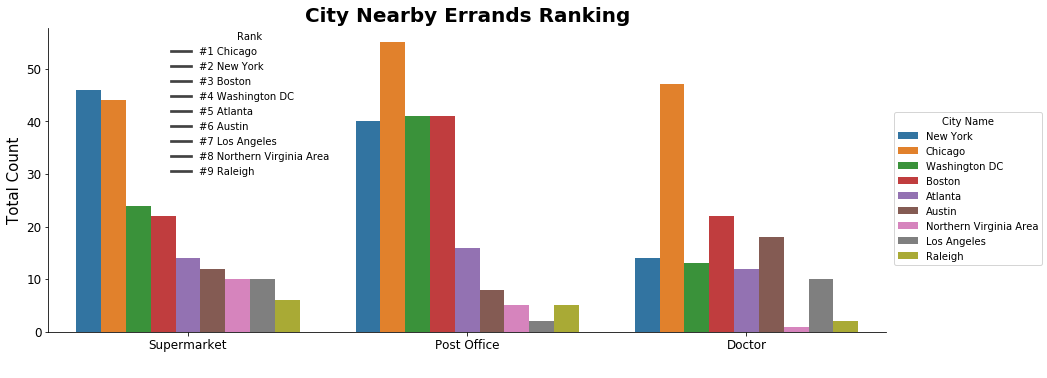

In [32]:
print("========================================")
print("==================TEST====================")

sns.factorplot(kind='bar',x='Type',y='Total Count',data=new_all_errands_df,
               hue='City Name', size=5, aspect=2.5)

total_count = new_all_errands_df.groupby(['City Name'])['Total Count'].sum().sort_values()[::-1].reset_index()
total_count_df = pd.DataFrame(total_count)
print(total_count_df)
ranks_dict = {}
y=1
for name in total_count_df['City Name']:
    ranks_dict[name] = y
    y=y+1
print(ranks_dict)

plt.title('City Nearby Errands Ranking', fontsize=20, fontweight='bold')

plt.xlabel(' ', fontsize=15)
plt.ylabel('Total Count', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

new_labels = ['#1 Chicago', '#2 New York ', '#3 Boston', '#4 Washington DC', '#5 Atlanta', '#6 Austin',
              '#7 Los Angeles', '#8 Northern Virginia Area', '#9 Raleigh']
plt.legend(new_labels, frameon=False, title='Rank',
           bbox_to_anchor=(.34, 1), loc=1, borderaxespad=0.)


print("========================================")
print("==================END====================")

plt.savefig('Save_Figs/Errands.png', bbox_inches='tight')

plt.show()